# T-SNE on Amzon Fine Food Review

# Amazon Fine Food Review is about the reviews of customers on the food.

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059

# Attribute information:
 
1) Id: Number of rows

2) ProductId: Unique ID of product 

3) UserId: User identification number

4) ProfileName: User name

5) HelpfulnessNumerator: Number of user found the review helpful

6) HelpfulnessDenominator: Number of user who found the review helpful or not

7) Score: Rating given to the product

8) Time: Timestamp at the time of review posted

9) Summary: Short version of text review

10) Text: Detailed text review

# Objective:

We need to find if the review is positive (1) or negative (0).

We are provided with the score from 1 to 5. Let's assume score 1 & 2 are negative and score 4 & 5 are positive. We are ignoring 3 as it can be considered as neutral.

# Loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warnings library is to ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset and displaying head of 5

df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Attribute Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
print('Number of columns:' + ' ' + str(len(df.columns)))
print('Number of rows:' + ' ' + str(df['Id'].nunique()))
print('Number of reviews:' + ' ' + str(df['Id'].nunique()))
print('Number of products:' + ' ' + str(df['ProductId'].nunique()))
print('Number of users:' + ' ' + str(df['UserId'].nunique()))

Number of columns: 10
Number of rows: 568454
Number of reviews: 568454
Number of products: 74258
Number of users: 256059


# Assign polarity to the score

If score is 3, we are removing it as it is neutral.

If score is 1 or 2 it will be assigned as 0 (negative).

If score is 4 or 5 it will be assigned as 1 (positive).

In [5]:
# Create a new dataframe which doesn't contain the score 3 and its respective rows.

df_f = df[df['Score']!=3]

def scr(sc):
    if sc < 3:
        return 0
    return 1

In [6]:
df_f['Score'] = df_f['Score'].apply(scr)
df_f['Score'].value_counts()

1    443777
0     82037
Name: Score, dtype: int64

In [7]:
print("Number of positive (1) reviews:" + ' ' + str(len(df_f[df_f['Score'] == 1])))
print("Number of negative (0) reviews:" + ' ' + str(len(df_f[df_f['Score'] == 0])))

Number of positive (1) reviews: 443777
Number of negative (0) reviews: 82037


# Data cleaning

# Null Values

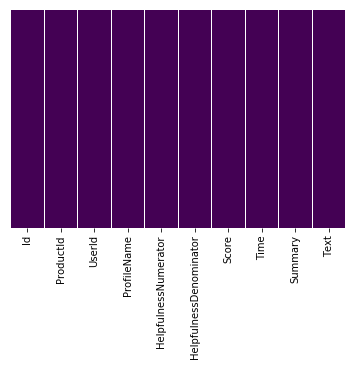

In [8]:
# Check for null values

sns.heatmap(df_f.isnull(), cmap='viridis', cbar= False, yticklabels=False)

# Observation:

From the above heatmap, we can observe that dataset has no null values.

HelpfulNumerator should always be less than or equals to HelpfulnuessDenominator.
First, let's check if there are any data under HelpfulnuessNumerator which is greater than HelpfulnuessDenominator.
If there are any then we will consider only those respective data where HelpfulNumerator is less than or equals HelpfulnuessDenominator

In [9]:
df_f[df_f['HelpfulnessNumerator'] > df_f['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


# Observation:

From the above data, we can see that HelpfulnessNumerator is greater than HelpfulnessDenominator. we shall consider only those respective data where HelpfulNumerator is lesser than HelpfulnuessDenominator

In [10]:
df_f = df_f[df_f['HelpfulnessNumerator'] <= df_f['HelpfulnessDenominator']]

In [11]:
df_f[df_f['HelpfulnessNumerator'] > df_f['HelpfulnessDenominator']]

# We have removed the data where HelpfulNumerator should always be less than HelpfulnuessDenominator.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


# Duplicates

Check for duplicates i.e check if there is any data where UserId, ProfileName, Time and Text are same.

In [12]:
df_f[(df_f['UserId'].duplicated() == True) & (df_f['ProfileName'].duplicated() == True) & (df_f['Time'].duplicated() == True) & (df_f['Text'].duplicated() == True)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,1,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,1,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,0,1127606400,Below standard,Too much of the white pith on this orange peel...
2336,2337,B0001FQVCK,A5D06XJHDXK75,C. Po,1,1,1,1190592000,"Baci's are pure heaven - great gift, stocking ...",My family has been in love with Baci's ever si...
2647,2648,B0016FY6H6,A2NLZ3M0OJV9NX,Mark Bodzin,0,0,0,1313107200,way too weak for my tastes,"What can i say, I love iced tea. I drink a lot..."
2653,2654,B0016FY6H6,A3I4PCBRENJNG2,L. Cain,0,0,1,1300579200,quality lightly sweetened green tea powder,lots of uses for this green tea...<br /><br />...
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,0,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,0,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
3885,3886,B005GX7GVW,AS1FCKNKY95ID,"Juli A. Lee ""JingleJL""",1,1,1,1336953600,Great and good price!,I love these noodles. They are really great f...


# Observation:

We see many duplicates in the dataset i.e UserId, ProfileName, Time and Text are same. Removing the duplicates as they are not useful.

In [13]:
# First let's sort the dataset by product ids.

df_sorted = df_f.sort_values('ProductId', axis = 0, ascending = True)

In [14]:
# Now removing duplicates

df_final = df_sorted.drop_duplicates(subset = {'UserId', 'ProfileName', 'Time', 'Text'}, keep = 'first', inplace = False)

In [15]:
print('Number of rows in df_final:' + ' ' + str(df_final.shape[0]))
print('Percentage reduced to:' + ' ' + str(100*(len(df_final['Id'])/len(df_f['Id']))))

Number of rows in df_final: 364171
Percentage reduced to: 69.25878450853156


# Text Preprocessing:

1) Remove HTML tag

2) Remove punctuations and numbers

3) Remove URLs

4) Renaming short forms like can't to can not, 's to is, 're to are, etc

5) Stop-word removal

6) Stemming

7) Change it to lowercase and join it.

In [16]:
# Importing required libraries.

import re
from nltk.corpus import stopwords  
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
from tqdm import tqdm

# Creating an object or an instance for snowball stemmer
ss = SnowballStemmer('english')

In [17]:
# Let us check few reviews to understand text data.

s_10 = df_final['Text'][10]
print(s_10, '\n')
print("*"*100, '\n')

s_30 = df_final['Text'].values[30]
print(s_30, '\n')
print("*"*100)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service! 

**************************************************************************************************** 

I give five stars to the Maurice Sendak story. One star for this printed edition of the book.<br />My children had 

# Observation:
We can see HTML tags, I'll, it's, I'm, etc.. We need to remove HTML tags, URLs, rename it's to it is etc.

# HTML tags

Defining a function to remove HTML tags from the text.

In [18]:
# Remove html tags

def html(ht):
    clean = re.compile('<.*?>')
    cleaned = re.sub(clean, ' ', ht)
    return cleaned

In [19]:
su = df_final['Summary'][10]
su1 = html(su)
su1

'The Best Hot Sauce in the World'

# Defining function to rename it's to it is, don't to do not, etc...

In [20]:
# Referred from notebook and also # https://stackoverflow.com/a/47091490/4084039

def short_word(full_word):
    
    full_word = full_word.lower()              # Python reads Won't and won't as separate words. So change to lowercase
    
    full_word = re.sub(r"won't", "will not", full_word) 
    full_word = re.sub(r"can't", "can not", full_word)
    full_word = re.sub(r"\'re", "are", full_word)
    full_word = re.sub(r"\'s", "is", full_word)
    full_word = re.sub(r"\'d", "would", full_word)
    full_word = re.sub(r"\'ll", "will", full_word)
    full_word = re.sub(r"\'ve", "have", full_word)
    full_word = re.sub(r"\'m", "am", full_word)
  
    return full_word

In [21]:
su2 = short_word(su1)

# Defining a function to remove URLs

In [22]:
# Referred from notebook and https://stackoverflow.com/a/40823105/4084039

def url(urls):
    urls = re.sub(r"http\S+","", urls)
    
    return urls

In [23]:
su3 = url(su2)

# Punctuation, stopwords and snowballstemming

Defining a function to remove punctuation, numerics, stopwords and stemming from the text.

In [24]:
def punc(pun):
    pun = re.sub('[^a-zA-Z]', ' ', pun)
    pun = pun.split()
    if len(pun)>2:
        pun = [ss.stem(sw) for sw in pun if sw not in stopwords.words('english')]
        pun = ' '.join(pun)
        return pun

In [25]:
punc(su3)

'best hot sauc world'

# FYI: Learnt this trick from kaggle.

Since our text data is huge, we will consider 1000 data.
To balance positive and negative review, we will consider 500 data each for positive and negative.
Let's create a new dataframe where we will have 1000 reviews, 500 each for positive and negative.

In [26]:
# Referred this from kaggle: https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization

df_pos = df_final[df_final['Score']==1].sample(n = 500) 

df_neg = df_final[df_final['Score']==0].sample(n = 500) 

# Concat df_pos and df_neg

df_1k = pd.concat([df_pos, df_neg])

In [27]:
print("Shape of df_1k:" + ' ' + str(df_1k.shape))
print("Number of positive review in df_1k:" + ' ' + str(len(df_1k[df_1k['Score'] == 1])))
print("Number of negative review in df_1k:" + ' ' + str(len(df_1k[df_1k['Score'] == 0])))

Shape of df_1k: (1000, 10)
Number of positive review in df_1k: 500
Number of negative review in df_1k: 500


# Apply text processing functions to 'Text' data
HTML tag removal, url, punctuation, stop word removal, rename

In [28]:
filtered = []
positive = []
negative = []
for i, s in enumerate (tqdm(df_1k['Text'].values)):
    
    h = html(s)                               # Removes html tags
    s = short_word(h)                         # Renames the short word to full word
    u = url(s)                                # Removes URLs
    p = punc(u)                               # Removes punctuations and numbers. Also remove stop words and apply stemming
    
    if df_1k['Score'].values[i] == 1:
        positive.append(p)                    # Creates list of positive reviews
    if df_1k['Score'].values[i] == 0:
        negative.append(p)                    # Creates list of positive reviews
    filtered.append(p)                        # Creates list of positive and negative reviews 

100%|██████████████████████████████████████| 1000/1000 [01:39<00:00,  7.93it/s]


In [29]:
print('Filtered data count:' + ' ' + str(len(filtered)))
print('Positive data count:' + ' ' + str(len(positive)))
print('Negative data count:' + ' ' + str(len(negative)))

Filtered data count: 1000
Positive data count: 500
Negative data count: 500


# Apply text processing functions to 'Summary' data
HTML tag removal, url, punctuation, stop word removal, rename

In [30]:
filtered_smr = []
positive_smr = []
negative_smr = []
for t, smr in enumerate (tqdm(df_1k['Summary'].values)):
    
    h_s = html(smr)                               # Removes html tags
    s_s = short_word(h_s)                         # Renames the short word to full word
    u_s = url(s_s)                                # Removes URLs
    p_s = punc(u_s)                               # Removes punctuations and numbers. Also remove stop words and apply stemming
    
    if df_1k['Score'].values[t] == 1:
        positive_smr.append(p_s)                    # Creates list of positive reviews
    if df_1k['Score'].values[t] == 0:
        negative_smr.append(p_s)                    # Creates list of positive reviews
    filtered_smr.append(p_s)                        # Creates list of positive and negative reviews 

100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 202.79it/s]


In [31]:
print('Filtered_smr data count:' + ' ' + str(len(filtered_smr)))
print('Positive_smr data count:' + ' ' + str(len(positive_smr)))
print('Negative_smr data count:' + ' ' + str(len(negative_smr)))

Filtered_smr data count: 1000
Positive_smr data count: 500
Negative_smr data count: 500


# Adding filtered text and summary to df_1k

In [32]:
#Adding a filtered text to the df_final.

df_1k['Cleaned_Text'] = filtered

#Adding a filtered text to the df_final.

df_1k['Cleaned_Summary'] = filtered_smr

In [33]:
# Saving the filtered dataframe as amaz_df.csv

# df_1k.to_csv('Amazon_1k_final.csv', index_label= False)

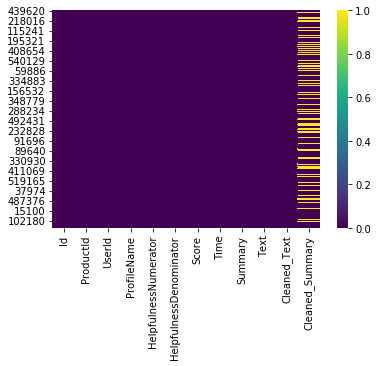

In [34]:
sns.heatmap(df_1k.isnull(), cmap = 'viridis')

# Observation:
After cleaning summary text, we can see lot many null values. Since, there are lot many null values, it is better don't construct bag of words, word2vec, tfidf, avg word2vec and tfidf-word2vec.

In [35]:
df_1k.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Cleaned_Summary
439620,439621,B000ZSX4D2,AI0BCEWRE04G0,Stoney,0,3,1,1337644800,Delicious,DESCRIPTION:<br />> Blue Diamond Roasted-Salte...,descript blue diamond roast salt almond moder ...,None
426926,426927,B000L7QJGG,AD28D0UKIX2ZW,A. Walter,3,3,1,1271980800,Helped with my weight loss,I tried the Vintage All Natural WuLong tea...s...,tri vintag natur wulong tea sort whim need fin...,help weight loss
22618,22619,B00170NWEI,A2A5CRU5N3EHTU,"Elaina E. Jackson ""Cool Aunt""",15,15,1,1248048000,"Rich, luscious and smooth, very leafy (not ste...","I've had Teavana, Mighty Leaf and many other g...",ihav teavana mighti leaf mani green sencha tea...,rich luscious smooth leafi stemmi


In [36]:
import nltk

freq_dist_pos=nltk.FreqDist(positive)
freq_dist_neg=nltk.FreqDist(negative)
print("Most Common Positive Words : ",freq_dist_pos.most_common(5), '\n')
print("Most Common Negative Words : ",freq_dist_neg.most_common(5))

Most Common Positive Words :  [('descript blue diamond roast salt almond moder roast canola safflow sunflow oil oili greasi light salt heart healthi oil actual good almond oil roast salt almond avail bag small can small blue diamond smokehous almond similar wonder smokey flavor time smokehous almond avail amazon oz smaller bag tri light salt varieti presum almost salt can vs bag various type blue diamond almond avail bag small can small can diamet high conveni assur almond stay fresh open afterward stay open long easi eat whole one set arguabl bag environment friend get much price break much cheaper packag prefer conveni fresh can evalu excel flavor well roast crunchi cannot decid like best roast salt smokehous although oili roast oil effect flavor whether thati good thing matter individu tast happen like roast oil flavor less roast almond prefer less roast almond roast without ad oil consid back natur california almond sea salt roast ounc pouch pack unroast almond unroast almond avail

# Observation:
    
From the most common negative words, we can notice find words 'like', 'enjoy' which actually are positive. So, it is better to use n-gram preferrably bi-gram.

# Bag of Words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer    # Importing CountVectorizer library

cv = CountVectorizer(ngram_range = (1,2))                      # Creating an instance for CountVectorizer

bow = cv.fit_transform(df_1k['Cleaned_Text'])                  # Applying fit_transform on cv

In [38]:
print("Type of bow ",type(bow))
print("Shape of bow ",bow.get_shape())
print("Number of unique words in bow ", bow.get_shape()[1])
print()
print("First 50 words in bag of words:" + ' ' + str(cv.get_feature_names()[0:50]))

Type of bow  <class 'scipy.sparse.csr.csr_matrix'>
Shape of bow  (1000, 36316)
Number of unique words in bow  36316

First 50 words in bag of words: ['aa', 'aa unroast', 'abandon', 'abandon smell', 'abdomin', 'abdomin cramp', 'abil', 'abil assembl', 'abil choos', 'abil make', 'abil tast', 'abl', 'abl buy', 'abl chew', 'abl enjoy', 'abl find', 'abl finish', 'abl get', 'abl make', 'abl salvag', 'abl see', 'abl substitut', 'abl take', 'abl tell', 'abl tri', 'abl use', 'absolut', 'absolut best', 'absolut bitter', 'absolut buy', 'absolut delici', 'absolut foul', 'absolut hand', 'absolut hint', 'absolut love', 'absolut nauseat', 'absolut necessari', 'absolut puzzl', 'absolut still', 'absolut tasteless', 'absolut terribl', 'absolut wonder', 'absolutley', 'absolutley amaz', 'absorb', 'absorb flavor', 'absorb system', 'absoult', 'absoult divin', 'abstain']


# Applying StandardScaler
Learnt applying standardscaler from kaggle to get all the data into one scale

In [39]:
# Referred this from kaggle: https://www.kaggle.com/premvardhan/amazon-fine-food-review-tsne-visualization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean = False)

sc_1k = sc.fit_transform(bow)

# T-SNE on bag of words

In [40]:
from sklearn.manifold import TSNE     # Importing TSNE library

tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200, random_state = 0)

In [41]:
print("Type of scaled matrix:" + ' ' + str(type(sc_1k)), '\n')

Type of scaled matrix: <class 'scipy.sparse.csr.csr_matrix'> 



# Observation:
We see that bag of words is sparse matrix and T-SNE doesn't take sparse matrix. We need to convert it to dense matrix

In [42]:
bow_dense = sc_1k.todense()

print("Type of bow after converting to dense matrix:" + ' ' + str(type(bow_dense)))

Type of bow after converting to dense matrix: <class 'numpy.matrixlib.defmatrix.matrix'>


Fit and transform the tsne bow.

In [43]:
tsne_bow = tsne.fit_transform(bow_dense)

label = df_1k['Score']

print("shape of bow before fit_transform:" + ' ' + str(bow.shape), '\n')

print("shape of bow after fit_transform:" + ' ' + str(tsne_bow.shape))

shape of bow before fit_transform: (1000, 36316) 

shape of bow after fit_transform: (1000, 2)


Stack tsne_bow and label columns vertically.

Note: Since shape of tsne_bow is (1000,2) and label is (1000,), we have to apply Transpose in order to stack.

In [44]:
# Stack tsne_bow and labels columns vertically.

stack_bow = np.vstack((tsne_bow.T, label)).T

# New dataframe is created using using the stacked data i.e stack.

df_bow = pd.DataFrame(data = stack_bow, columns = ('x_bow', 'y_bow', 'label'))

Visualizing T-SNE on bag of words

Text(0.5, 1.0, 'T-SNE on bag of words')

<Figure size 720x720 with 0 Axes>

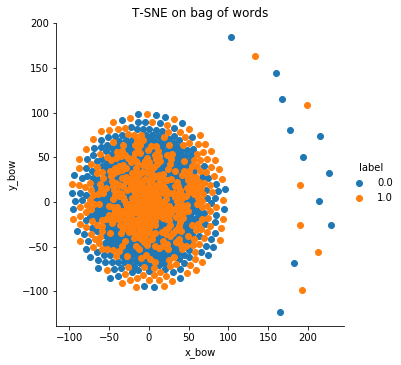

In [45]:
plt.figure(figsize = (10,10))
f = sns.FacetGrid(df_bow, hue = 'label', size = 5)
f.map(plt.scatter, 'x_bow', 'y_bow')
f.add_legend()
plt.title('T-SNE on bag of words')

# Observation:

There are lot many overlaps between positive (1) and negative (0) reviews.

# TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range = (1,2))

final_tfidf = tfidf.fit_transform(df_1k['Cleaned_Text'])

In [47]:
print("Type of tfidf vectorizer ",type(final_tfidf))
print("Shape of final_tfidf ",final_tfidf.get_shape())
print("Number of unique words in final_tfidf", final_tfidf.get_shape()[1])

Type of tfidf vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
Shape of final_tfidf  (1000, 36316)
Number of unique words in final_tfidf 36316


In [48]:
feature = tfidf.get_feature_names()
print("First feature:" + ' ' + str(feature[0:10]))

First feature: ['aa', 'aa unroast', 'abandon', 'abandon smell', 'abdomin', 'abdomin cramp', 'abil', 'abil assembl', 'abil choos', 'abil make']


# Observation:
    
We see few unigrams like 'aamazon', 'abandon' and few bigrams like 'aamazon com', 'abandon bone' etc...

# Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean = False)

tf_sc = sc.fit_transform(final_tfidf)

# T-SNE on Tf-Idf

In [50]:
from sklearn.manifold import TSNE     # Importing TSNE library

tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200, random_state = 0)

In [51]:
print("Type of scaled matrix:" + ' ' + str(type(tf_sc)), '\n')

Type of scaled matrix: <class 'scipy.sparse.csr.csr_matrix'> 



# Observation:
We see that tf-idf is sparse matrix and T-SNE doesn't take sparse matrix. We need to convert it to dense matrix

In [52]:
tf_dense = tf_sc.todense()

print("Type of tf-idf after converting to dense matrix:" + ' ' + str(type(tf_dense)))

Type of tf-idf after converting to dense matrix: <class 'numpy.matrixlib.defmatrix.matrix'>


Fit and transform the tf_dense.

In [53]:
tsne_tf = tsne.fit_transform(tf_dense)

label = df_1k['Score']

print("shape of tfidf before fit_transform:" + ' ' + str(final_tfidf.shape), '\n')

print("shape of tfidf after fit_transform:" + ' ' + str(tsne_tf.shape))

shape of tfidf before fit_transform: (1000, 36316) 

shape of tfidf after fit_transform: (1000, 2)


In [54]:
# Stack tsne_bow and labels columns vertically.

stack_tf = np.vstack((tsne_tf.T, label)).T

# New dataframe is created using using the stacked data i.e stack.

df_tf = pd.DataFrame(data = stack_tf, columns = ('x_tf', 'y_tf', 'label'))

Text(0.5, 1.0, 'T-SNE on TFIDF')

<Figure size 720x720 with 0 Axes>

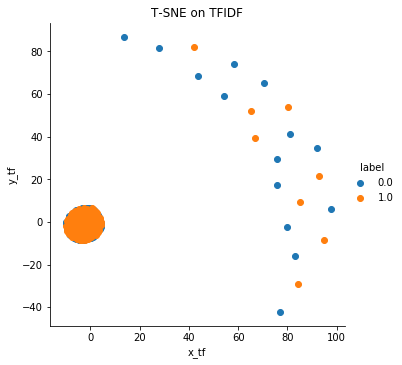

In [55]:
plt.figure(figsize = (10,10))
f = sns.FacetGrid(df_tf, hue = 'label', size = 5)
f.map(plt.scatter, 'x_tf', 'y_tf')
f.add_legend()
plt.title('T-SNE on TFIDF')

# Observation:

There are lot many overlaps between positive (1) and negative (0) reviews.

# Word2Vec

In [56]:
w2v = []
for w in df_1k['Text'].values:
    
    hl = html(w)
    hl = re.sub('[^a-zA-Z]', ' ', hl)
    hl = hl.lower()
        
    w2v.append(hl.split())

In [57]:
import gensim

w2v_model = gensim.models.Word2Vec(w2v, min_count = 5, size = 50, workers = 4)

print(w2v_model)

Word2Vec(vocab=1638, size=50, alpha=0.025)


In [58]:
w2v_vocab = w2v_model[w2v_model.wv.vocab]

print("Shape of w2v_vocab:" + '  ' + str(w2v_vocab.shape))

Shape of w2v_vocab:  (1638, 50)


In [59]:
w2v_word = list(w2v_model.wv.vocab)

print("Length of w2v_word:" + ' ' + str(len(w2v_word)))

Length of w2v_word: 1638


In [60]:
print("Most similar words for like are:", '\n')
w2v_model.wv.most_similar('like')

Most similar words for like are: 



[('when', 0.9997945427894592),
 ('salt', 0.9997832775115967),
 ('but', 0.9997830390930176),
 ('what', 0.9997774362564087),
 ('sugar', 0.9997655153274536),
 ('also', 0.999763548374176),
 ('add', 0.9997620582580566),
 ('water', 0.9997599124908447),
 ('because', 0.9997597336769104),
 ('that', 0.9997544288635254)]

# Avg Word2Vec

In [61]:
sentence = [] # avg w2v of sentence/review will be stored in the empty list

for sen in tqdm(w2v):
    zero = np.zeros(50)  # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
    count_div = 0         # Increases by 1 every iteration and divides the w2v the sum of w2v sentence/review
    for word in sen:
        if word in w2v_word:
            vec = w2v_model.wv[word]  # Gets the w2v for each word in a sentence/review
            zero += vec              # Sums the w2v of each word in a sentence/review at every iteration
            count_div += 1           # Increases by 1 at every iteration
    if count_div != 0:
        zero /= count_div            # w2v of sentence/review is divided by total number of words in a sentence/review (average w2v)
    sentence.append(zero)            # Stores all the avg w2z in an empty list sentence

100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 301.28it/s]


In [62]:
print("Length of sentence:" + ' ' + str(len(sentence)))
print("Length of 0 index sentence:" + ' ' + str(len(sentence[0])))

Length of sentence: 1000
Length of 0 index sentence: 50


# T-SNE on Avg Word2Vec

In [63]:
from sklearn.manifold import TSNE     # Importing TSNE library

tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200, random_state = 0)

# Fit and transform
avg_tsne = tsne.fit_transform(sentence)

In [64]:
print("Type of avg_tsne matrix:" + ' ' + str(type(avg_tsne)), '\n')

Type of avg_tsne matrix: <class 'numpy.ndarray'> 



In [65]:
# Stack avg_tsne and label columns vertically.

stack_avg_tsne = np.vstack((avg_tsne.T, label)).T

# New dataframe is created using using the stacked data i.e stack.

df_avg_tsne = pd.DataFrame(data = stack_avg_tsne, columns = ('x_avg_tsne', 'y_avg_tsne', 'label'))

Text(0.5, 1.0, 'T-SNE Average Word2Vec')

<Figure size 720x720 with 0 Axes>

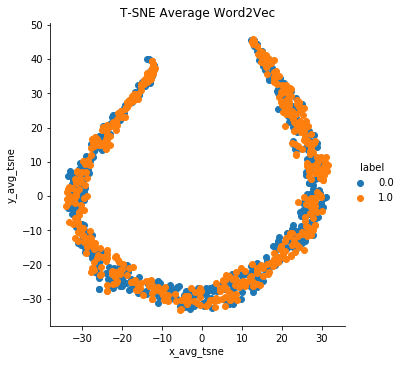

In [66]:
plt.figure(figsize = (10,10))
f = sns.FacetGrid(df_avg_tsne, hue = 'label', size = 5)
f.map(plt.scatter, 'x_avg_tsne', 'y_avg_tsne')
f.add_legend()
plt.title('T-SNE Average Word2Vec')

# Observation:

There are lot many overlaps between positive (1) and negative (0) reviews.

# Tf-Idf Word2Vec

In [67]:
tf_model = TfidfVectorizer()

tf_idf_matrix = tf_model.fit_transform(df_1k['Cleaned_Text'].values)

# we are converting a dictionary with word as a key, and the idf as a value

dicti = dict(zip(tf_model.get_feature_names(), list(tf_model.idf_)))

tf_feat = tf_model.get_feature_names()

In [68]:
tf_sentence = []   # Empty list to store the tfidf-w2v values

for tf_sent in tqdm(w2v):
    tf_zero = np.zeros(50)     # (50,) matrix which is initial to add to the first w2v of word in a sentence/review
    tf_count = 0                # Increases by tfidf value of previous tfidf value for every iteration and divides the sum of tfidf-w2v of sentence/review
    for tf_word in tf_sent:
        if tf_word in w2v_word:
            tf_vec = w2v_model.wv[tf_word]  # Get tfidf_w2v for each word in a sentence/review       
            if tf_word in dicti:
                # tf_w2v = tf_idf_matrix[row, tf_feat.index(tf_word)]
                tf_w2v = dicti[tf_word] * (tf_sent.count(tf_word))/len(tf_sent) 
                tf_zero += (tf_vec * tf_w2v)    # Increase by tfidf-w2v value for every iteration
                tf_count += tf_w2v              # Increase by ifidf value for every iteration
    if tf_count != 0:
        tf_zero /= tf_count                     # tfidf-w2v of sentence/review is divided by total number of tfidf of words in a sentence/review (tfidf-w2v)
    tf_sentence.append(tf_zero)                # Stores all the avg w2z in an empty list sentence

100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 281.67it/s]


# T-SNE on tfidf_w2v

In [69]:
from sklearn.manifold import TSNE     # Importing TSNE library

tsne = TSNE(n_components = 2, perplexity = 30, learning_rate = 200, random_state = 0)

# Fit and transform tf_sentence
tf_w2v_tsne = tsne.fit_transform(tf_sentence)

In [70]:
print("Type of tf_w2v_tsne matrix:" + ' ' + str(type(tf_w2v_tsne)), '\n')

Type of tf_w2v_tsne matrix: <class 'numpy.ndarray'> 



In [71]:
# Stack avg_tsne and label columns vertically.

stack_tf_w2v_tsne = np.vstack((tf_w2v_tsne.T, label)).T

# New dataframe is created using using the stacked data i.e stack.

df_tf_w2v_tsne = pd.DataFrame(data = stack_tf_w2v_tsne, columns = ('x_tf_w2v_tsne', 'y_tf_w2v_tsne', 'label'))

Text(0.5, 1.0, 'T-SNE TF-IDF Word2Vec')

<Figure size 720x720 with 0 Axes>

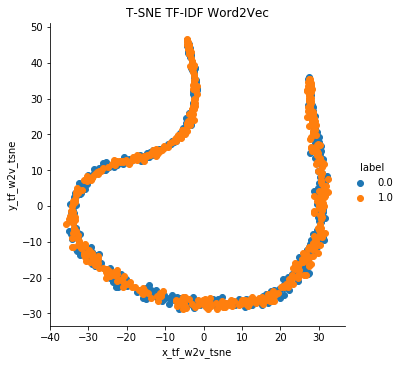

In [72]:
plt.figure(figsize = (10,10))
f = sns.FacetGrid(df_tf_w2v_tsne, hue = 'label', size = 5)
f.map(plt.scatter, 'x_tf_w2v_tsne', 'y_tf_w2v_tsne')
f.add_legend()
plt.title('T-SNE TF-IDF Word2Vec')

# Observation:

There are lot many overlaps between positive (1) and negative (0) reviews

# Conclusion:

From all T-SNE graphs over bag of words, tf-idf, average-word2vec and tfidf-word2vec, we can see lots of overlap between positive (1) and negative (0) reviews.

It is hard to draw a plane/hyperplane to separate positive and negative review.